# Simple decision trees
Can you do better than the k-NN baseline with decision trees?

In [5]:
import importlib; import cours_proj4_funcs; 
importlib.reload(cours_proj4_funcs)
from cours_proj4_funcs import f_read_npzF, f_addIdxFeat, f_fileApp

<module 'cours_proj4_funcs' from '/home/wilfredo/Documents/training/DS_epfl_2019/4_appliedML2/courseproj_04/cours_proj4_funcs.py'>

In [6]:
import numpy as np
import os

X_tr_ini, y_tr_ini, X_data_tr, fnames_tr, y_cat_tr = f_read_npzF(os.path.join('data', 'data_train.npz'))
X_tr_ini1 = f_addIdxFeat(X_tr_ini)

X_va_ini, y_va_ini, X_data_va, fnames_va, y_cat_va = f_read_npzF(os.path.join('data', 'data_valid.npz'))
X_va_ini1 = f_addIdxFeat(X_va_ini)

X_te_ini, y_te_ini, X_data_te, fnames_te, y_cat_te = f_read_npzF(os.path.join('data', 'data_test.npz'))
X_te_ini1 = f_addIdxFeat(X_te_ini)

- What accuracy can you achieve with a depth of 3?

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree
dt_3 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Fit decision tree
dt_3.fit(X_tr_ini, y_tr_ini)

# Get train/test scores
print('Train accuracy: {:.3f}'.format(dt_3.score(X_tr_ini, y_tr_ini)) )
# Prints: 0.870

Train accuracy: 0.775


In [8]:
test_acc_dt3 = dt_3.score(X_te_ini, y_te_ini)
print("Decision tree test accuracy: {}".format(test_acc_dt3))

# Decision tree accuracy to append into the file 
f_fileApp('data/results09.csv',1,"decision tree", test_acc_dt3)

Decision tree test accuracy: 0.66


- Plot the corresponding tree with graphviz

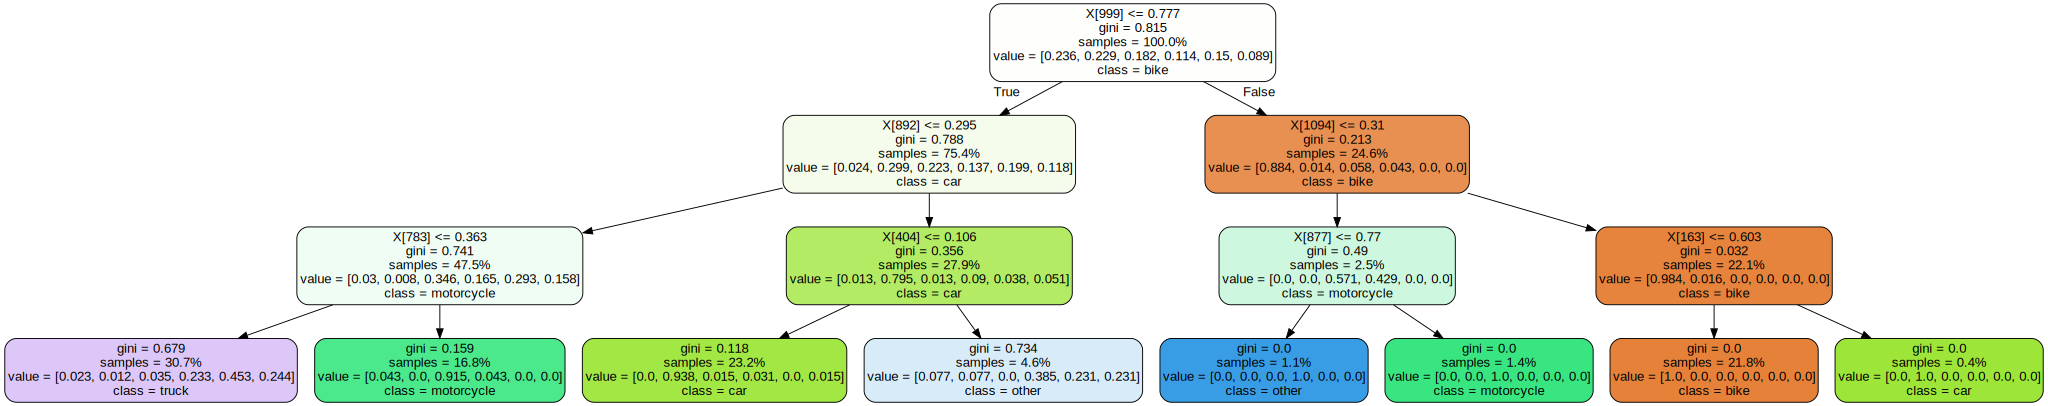

In [9]:
categs = [cat_name.split(':')[1] for cat_name in y_cat_tr ]

import graphviz
from sklearn.tree import export_graphviz

# Export decision tree
dot_data_3 = export_graphviz( dt_3
                             ,out_file=None
                             #,feature_names=#features.columns
                             ,class_names=categs 
                             ,filled=True, rounded=True, proportion=True )

# Display it
graphviz.Source(dot_data_3)

- Do you get better results if you reduce the number of dimensions with PCA first?

In [10]:
from sklearn.decomposition import PCA

pca = PCA(0.80) # Running PCA retaining 80% of the variance
X_proj = pca.fit_transform(X_tr_ini, y=None) 

print("reducing features from {} to {}".format(X_tr_ini.shape, X_proj.shape)) #

reducing features from (280, 1280) to (280, 81)


In [12]:
# Create decision tree
dt_proj = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Fit decision tree
dt_proj.fit(X_proj, y_tr_ini)

# Get train/test scores
print('Train accuracy: {:.3f}'.format(dt_proj.score(X_proj, y_tr_ini)) )
# Prints: 0.870

Train accuracy: 0.793


The train accuracy withoug applying PCA is `0.775` and with PCA `0793`, so we got a slightly better accuray with PCA